In [1]:
import vtk

In [1]:
%matplotlib inline
from dipy.reconst.dti import fractional_anisotropy, color_fa
from argparse import ArgumentParser
from scipy import ndimage
import os
import re
import numpy as np
import nibabel as nb
import sys
import matplotlib

# matplotlib.use('Agg')  # very important above pyplot import
import matplotlib.pyplot as plt

In [2]:
from dipy.reconst.dti import from_lower_triangular

In [4]:
img = nb.load('new/v110_ch0_tensorfsl_dogsig1_gausig2.3.nii')

In [5]:
data = img.get_data()
output = from_lower_triangular(data)
output_ds = output[:, :, :, :, :]
print output.shape
print output_ds.shape

(106, 76, 76, 3, 3)
(106, 76, 76, 3, 3)


In [6]:
print data.shape

(106, 76, 76, 6)


In [7]:
# FA = fractional_anisotropy(output_ds)
# FA = np.clip(FA, 0, 1)
# FA[np.isnan(FA)] = 0
# print FA.shape

In [8]:
from dipy.reconst.dti import decompose_tensor

In [9]:
evalues, evectors = decompose_tensor(output_ds)
print evectors[..., 0, 0].shape
print evectors.shape[-2:]

(106, 76, 76)
(3, 3)


In [10]:
print evalues.shape, evectors.shape

(106, 76, 76, 3) (106, 76, 76, 3, 3)


In [11]:
# print FA[:, :, :, 0].shape
print evectors.shape

(106, 76, 76, 3, 3)


In [12]:
FA = fractional_anisotropy(evalues)
print FA.shape

(106, 76, 76)


In [13]:
RGB = color_fa(FA, evectors)
nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), img.get_affine()), 'tensor_rgb_upper.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  from ipykernel import kernelapp as app


In [14]:
def plot_rgb(im):
    plt.rcParams.update({'axes.labelsize': 'x-large',
                         'axes.titlesize': 'x-large'})

    if im.shape == (182, 218, 182):
        x = [78, 90, 100]
        y = [82, 107, 142]
        z = [88, 103, 107]
    else:
        shap = im.shape
        x = [int(shap[0]*0.35), int(shap[0]*0.51), int(shap[0]*0.65)]
        y = [int(shap[1]*0.35), int(shap[1]*0.51), int(shap[1]*0.65)]
        z = [int(shap[2]*0.35), int(shap[2]*0.51), int(shap[2]*0.65)]
    coords = (x, y, z)

    labs = ['Sagittal Slice (YZ fixed)',
            'Coronal Slice (XZ fixed)',
            'Axial Slice (XY fixed)']
    var = ['X', 'Y', 'Z']

    idx = 0
    for i, coord in enumerate(coords):
        for pos in coord:
            idx += 1
            ax = plt.subplot(3, 3, idx)
            ax.set_title(var[i] + " = " + str(pos))
            if i == 0:
                image = ndimage.rotate(im[pos, :, :], 90)
            elif i == 1:
                image = ndimage.rotate(im[:, pos, :], 90)
            else:
                image = im[:, :, pos]

            if idx % 3 == 1:
                ax.set_ylabel(labs[i])
                ax.yaxis.set_ticks([0, image.shape[0]/2, image.shape[0] - 1])
                ax.xaxis.set_ticks([0, image.shape[1]/2, image.shape[1] - 1])

            plt.imshow(image)

    fig = plt.gcf()
    fig.set_size_inches(12.5, 10.5, forward=True)
    return fig

In [15]:
affine = img.get_affine()

fa = nb.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
im = fa.get_data()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [16]:
# print np.asarray(fa)

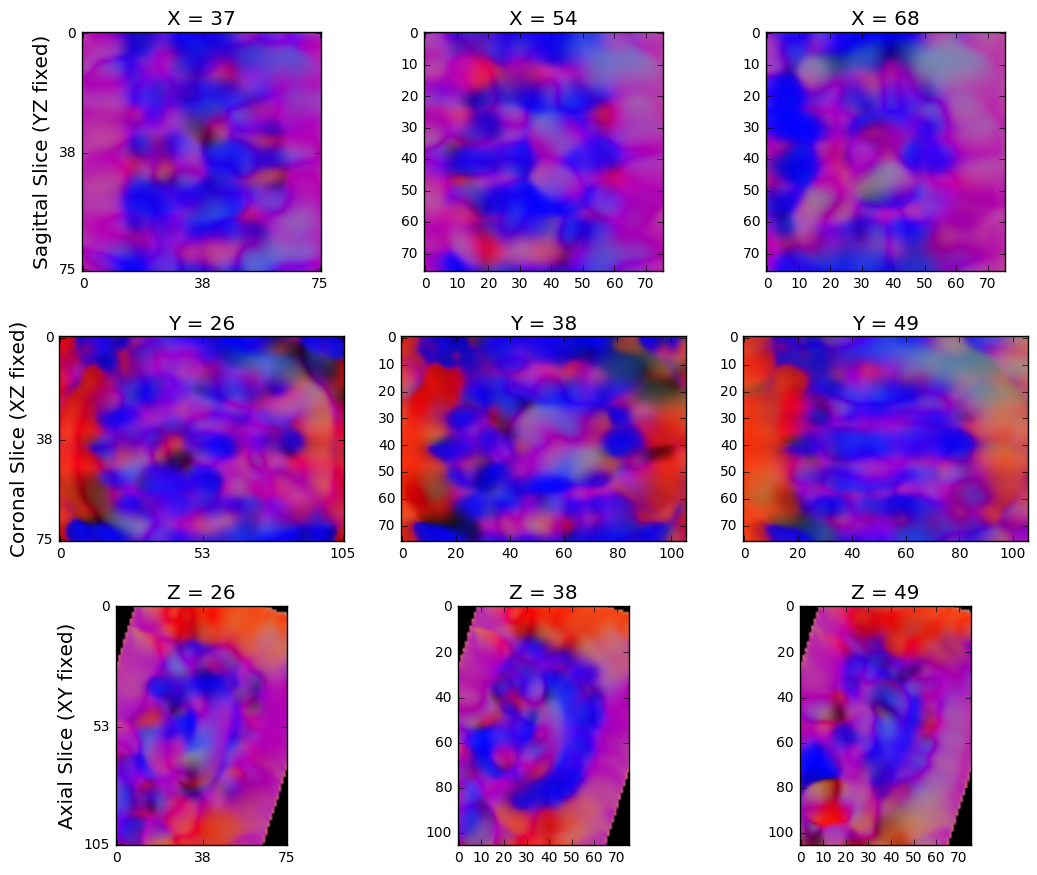

In [17]:
fig = plot_rgb(im)

In [18]:
import os

In [19]:
import dipy.reconst.dti as dti
from dipy.reconst.dti import fractional_anisotropy

In [20]:
from dipy.data import default_sphere
from dipy.direction import DeterministicMaximumDirectionGetter
from dipy.io.trackvis import save_trk
from dipy.reconst.csdeconv import ConstrainedSphericalDeconvModel

from dipy.data import get_sphere

sphere = get_sphere('symmetric724')
from dipy.reconst.dti import quantize_evecs

peak_indices = quantize_evecs(evectors, sphere.vertices)

In [21]:
print FA.shape

(106, 76, 76)


In [22]:
from dipy.tracking.eudx import EuDX

eu = EuDX(FA.astype('f8'), peak_indices, seeds=50000, odf_vertices = sphere.vertices, a_low=0.2)

tensor_streamlines = [streamline for streamline in eu]

In [24]:
import pickle
pickle.dump( tensor_streamlines, open( "streamlines.p", "wb" ) )

In [25]:
len(tensor_streamlines)

48209

In [26]:
r = 100
import random
rlist = random.sample(range(1, len(tensor_streamlines)), 100)
print rlist

[3178, 45241, 16596, 44335, 9825, 16063, 48088, 12463, 37858, 32562, 27140, 5555, 14049, 27299, 35080, 36447, 33406, 46291, 15538, 12928, 8615, 12916, 43671, 35440, 23001, 34699, 10412, 36519, 6986, 29224, 36093, 18726, 25326, 21840, 5647, 32144, 38839, 10379, 34152, 5050, 17317, 36713, 21523, 15597, 23641, 19439, 16769, 37762, 46829, 13981, 31423, 12699, 6996, 47755, 7131, 24281, 41360, 27055, 13566, 1737, 35576, 43452, 12890, 17783, 32055, 1071, 39258, 1161, 42013, 44700, 37909, 46360, 4945, 40920, 36268, 35939, 36105, 45749, 44725, 5507, 44738, 38189, 29141, 16027, 4963, 1335, 36354, 25331, 9366, 28340, 1486, 36617, 26513, 2890, 19615, 12104, 37567, 24493, 12866, 28924]


In [27]:
tensor_streamlines_100 = [tensor_streamlines[i] for i in rlist]
print len(tensor_streamlines_100)

100


In [28]:
tensor_streamlines_trk = ((sl, None, None) for sl in tensor_streamlines)

In [28]:
# print len(tensor_streamlines_trk)

100


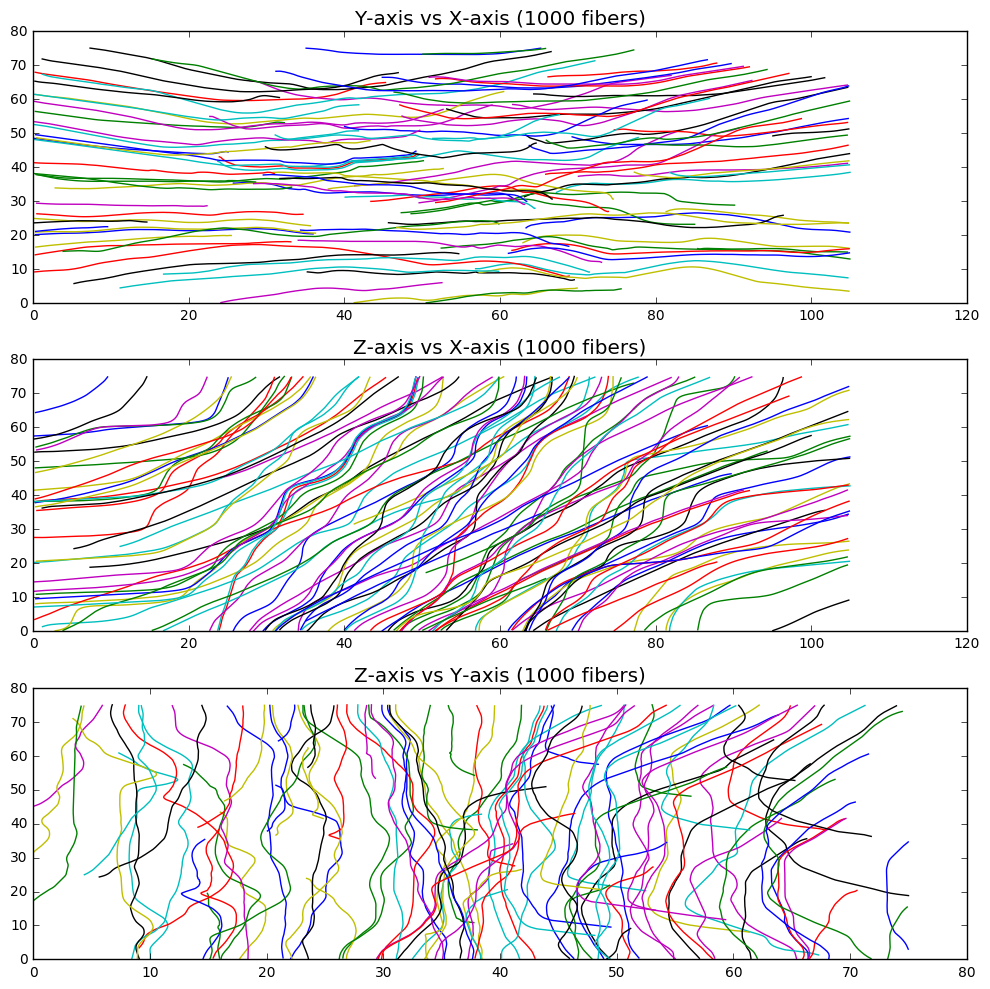

In [29]:
# test = tensor_streamlines[0:1000]
test = tensor_streamlines_100
print len(test)
plt.figure(1)
plt.subplots(figsize=(10, 10))
plt.subplot(311)
plt.title("Y-axis vs X-axis (1000 fibers)")
for i in range(len(test)):
    plt.plot(test[i][:,0], test[i][:,1])
plt.subplot(312)
plt.title("Z-axis vs X-axis (1000 fibers)")
for i in range(len(test)):
    plt.plot(test[i][:,0], test[i][:,2])
plt.subplot(313)
plt.title("Z-axis vs Y-axis (1000 fibers)")
for i in range(len(test)):
    plt.plot(test[i][:,1], test[i][:,2])
plt.tight_layout()
plt.show()

48209


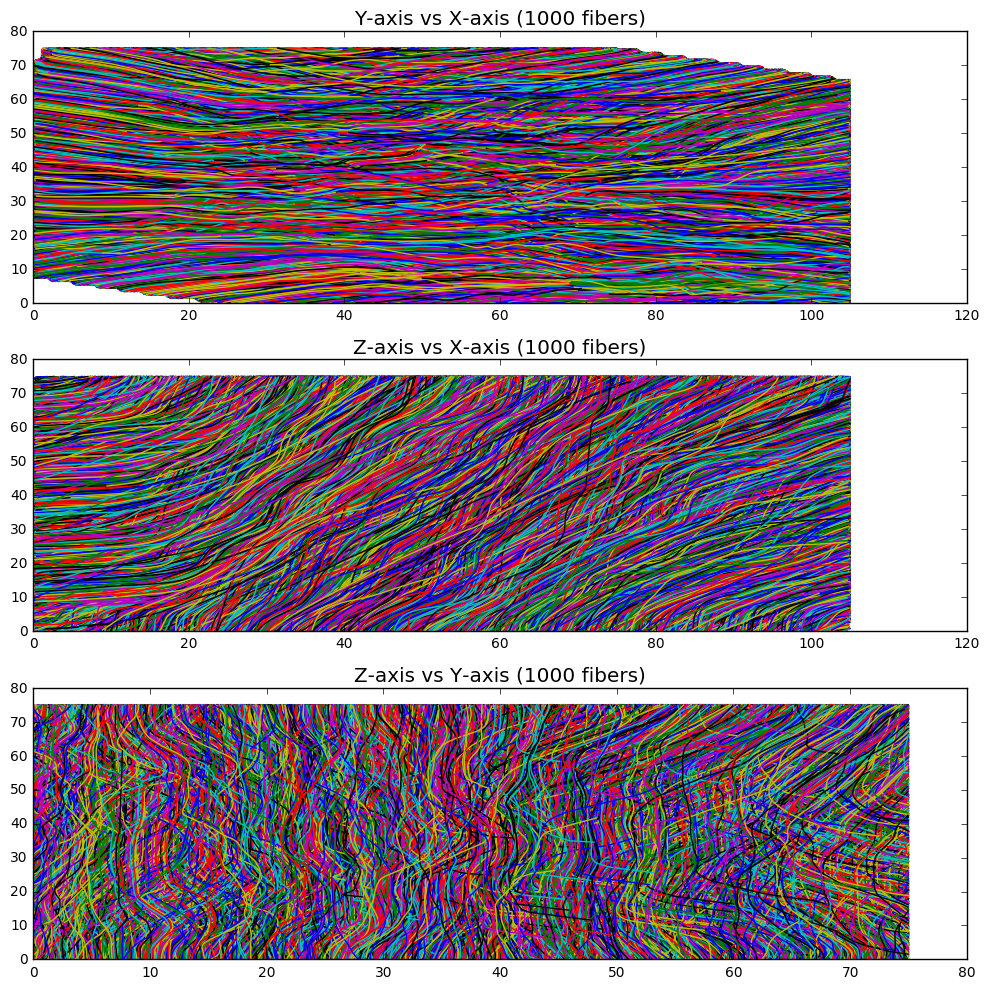

In [31]:
# test = tensor_streamlines[0:1000]
test = tensor_streamlines
print len(test)
plt.figure(1)
plt.subplots(figsize=(10, 10))
plt.subplot(311)
plt.title("Y-axis vs X-axis (1000 fibers)")
for i in range(len(test)):
    plt.plot(test[i][:,0], test[i][:,1])
plt.subplot(312)
plt.title("Z-axis vs X-axis (1000 fibers)")
for i in range(len(test)):
    plt.plot(test[i][:,0], test[i][:,2])
plt.subplot(313)
plt.title("Z-axis vs Y-axis (1000 fibers)")
for i in range(len(test)):
    plt.plot(test[i][:,1], test[i][:,2])
plt.tight_layout()
plt.show()

In [30]:
print len(tensor_streamlines)

48209
